# Simposns paradox

In [27]:
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline
group1X = np.random.random(50)+1.5
group1Y = np.random.random(50)+2.5

group2X = np.random.random(100)+2
group2Y = np.random.random(100)+2

group3X = np.random.random(200)+2.5
group3Y = np.random.random(200)+1.5


g1 = pd.DataFrame([group1X,group1Y]).transpose()
g1.columns = ["Money","Jail"]
g1["Group"] = "Black"

g2 = pd.DataFrame([group2X,group2Y]).transpose()
g2.columns = ["Money","Jail"]
g2["Group"] = "Hispanic"

g3 = pd.DataFrame([group3X,group3Y]).transpose()
g3.columns = ["Money","Jail"]
g3["Group"] = "White"

g = pd.concat([g1,g2,g3])


In [6]:
import seaborn as sns

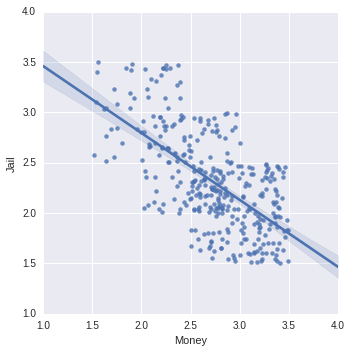

In [28]:
sns.lmplot("Money","Jail",data=g)

In [29]:

import statsmodels.formula.api as smf

mod = smf.ols(formula='Jail ~ Money', data=g)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Jail   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     237.3
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           3.43e-41
Time:                        12:25:59   Log-Likelihood:                -148.11
No. Observations:                 350   AIC:                             300.2
Df Residuals:                     348   BIC:                             307.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1241      0.119     34.665      0.0

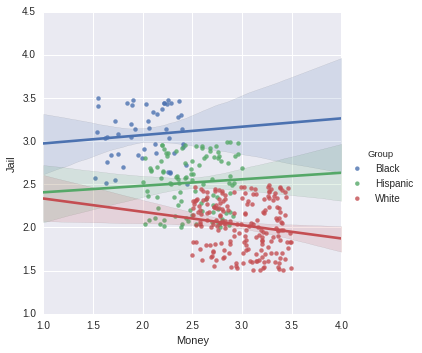

In [30]:
sns.lmplot("Money","Jail",hue="Group",data=g)

In [31]:
mod = smf.ols(formula='Jail ~ Money+C(Group)', data=g)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Jail   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           3.40e-72
Time:                        12:26:17   Log-Likelihood:                -70.145
No. Observations:                 350   AIC:                             148.3
Df Residuals:                     346   BIC:                             163.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.1917 

In [32]:
mod = smf.mixedlm(formula='Jail ~ Money', data=g,groups="Group")
res = mod.fit()
print(res.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Jail    
No. Observations: 350     Method:             REML    
No. Groups:       3       Scale:              0.0884  
Min. group size:  50      Likelihood:         -81.8924
Max. group size:  200     Converged:          Yes     
Mean group size:  116.7                               
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    2.701    0.317  8.522 0.000  2.080  3.323
Money       -0.065    0.056 -1.156 0.247 -0.174  0.045
groups RE    0.241    0.822                           



In [33]:
res.random_effects

{'Black': groups    0.499254
 dtype: float64, 'Hispanic': groups   -0.019282
 dtype: float64, 'White': groups   -0.479971
 dtype: float64}